<a href="https://colab.research.google.com/github/Kevin2558/Data_Science/blob/main/01_Fundamentos/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descarga de todos los datasets**

In [1]:
import kagglehub

# Downoad latest version
path1 = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path1)

Path to dataset files: /kaggle/input/fashionmnist


In [2]:
import kagglehub

# Downoad latest version
path2 = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path2)

100%|██████████| 24.5M/24.5M [00:00<00:00, 53.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2


In [3]:
import kagglehub

# Download latest version
path3 = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path3)

Path to dataset files: /kaggle/input/wine-quality


In [4]:
import kagglehub

# Download latest version
path4 = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path4)

Path to dataset files: /kaggle/input/creditcardfraud


In [5]:
import kagglehub

# Download latest version
path5 = kagglehub.dataset_download("ujjwalchowdhury/energy-efficiency-data-set")

print("Path to dataset files:", path5)

100%|██████████| 6.27k/6.27k [00:00<00:00, 2.05MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ujjwalchowdhury/energy-efficiency-data-set/versions/2


# **Parte 1 - Reducción de dimensionalidad (solo pre-procesamiento)**

# **Ejercicio 1: Fashion MNIST**

El objetivo del primer ejercicio es realizar una reducción de dimensionalidad a través de PCA conservando el 95% de la varianza a un dataset. El dataset que se ocupará es Fashion MNIST el cual posee 60.000 ejemplos de prendas de vestir codificadas en 28x28 pixeles en escalas de grises.

Partiremos cargando de las librerías necesarias para la reducción de dimensionalidad y visualización.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Carguemos el dataset y hagamos una visualización de sus primeras 5 filas para ver su estructura y si es necesario realizar algún arreglo.

In [26]:
df1 = pd.read_csv(path1 + '/fashion-mnist_train.csv')
print(df1.head())
df1.shape

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

(60000, 785)

Ahora veamos si el dataset posee datos nulos para corregirlos.

In [61]:
nulos = df1.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame? {nulos}")

¿Hay algún valor nulo en el DataFrame? False


Procedemos a eliminar la primera columna del dataset, ya que esta corresponde a una codificacion para saber el tipo de vestimenta y no aporta información en el procesamiento de los datos.  

In [27]:
df1 = df1.drop(columns=['label'])

Lo primero que debemos hacer antes de realizar la reduccion de dimensionalidad a través de PCA es estandarizar los datos para que así las variables con una dimensionalidad alta no dominen el análisis y las de baja dimensionalidad se vean representadas.

In [28]:
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(df1)

Ahora podemos aplicar PCA. En este caso buscamos conservar el 95% de la varianza de los datos.

In [29]:
pca = PCA(n_components=0.95)
X_pca_1 = pca.fit_transform(X_scaled_1)

In [30]:
X_pca_1.shape

(60000, 256)

Notemos que luego de aplicar PCA las imagenes se ven representadas a través de 256 componentes que explican el 95% de la varianza de los datos.

Procedamos a visualizar las componentes principales de la reducción realizada por PCA. Estas permiten entender como las caracteristicas originales se combinan linealmente para formar los nuevos componentes reducidos.

In [31]:
pca.components_

array([[ 0.00031395,  0.00088127,  0.00149325, ...,  0.0064913 ,
         0.0014661 ,  0.0006676 ],
       [ 0.00017932,  0.0014502 ,  0.00115874, ...,  0.0140834 ,
         0.00961568,  0.00409087],
       [ 0.00011493,  0.00085995,  0.00188652, ...,  0.00893996,
        -0.00232472, -0.00124449],
       ...,
       [-0.02489535,  0.04248402, -0.00491171, ..., -0.01958045,
         0.05528764, -0.05775233],
       [-0.00171487, -0.01212216,  0.02063736, ...,  0.01992995,
         0.04327893,  0.01432107],
       [-0.01670649,  0.02860561, -0.05222822, ..., -0.03128197,
         0.04455644, -0.00301969]])

Lo siguiente nos mostrará cuanta varianza está explicando cada componente principal ordenadas de mayor a menor. Esto nos ayuda a visualizar cuantas componentes seleccionar. En este caso, como le pedimos que conserve el 95% de la varianza selecciona el mínimo número de componentes que juntas cumplan el 95%.

In [32]:
pca.explained_variance_ratio_

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833,
       0.01161488, 0.00963108, 0.00890642, 0.00856623, 0.00743049,
       0.00730157, 0.00657498, 0.00632692, 0.00623657, 0.0058046 ,
       0.00515707, 0.00511548, 0.00472764, 0.00453557, 0.00438423,
       0.00416784, 0.00395056, 0.00393244, 0.00378355, 0.00374478,
       0.00368528, 0.00353646, 0.00336422, 0.00330015, 0.00329434,
       0.00319736, 0.00305999, 0.00293714, 0.00289203, 0.00280918,
       0.00271998, 0.00265986, 0.00255732, 0.00253773, 0.00245191,
       0.00243254, 0.0023872 , 0.00228126, 0.00223339, 0.00215709,
       0.00212645, 0.00209085, 0.0020228 , 0.00201541, 0.00199305,
       0.00195332, 0.00191017, 0.00185777, 0.00181596, 0.00178264,
       0.00175763, 0.00173528, 0.00170987, 0.00167605, 0.00161354,
       0.00157432, 0.00154656, 0.00150991, 0.00148749, 0.00146464,
       0.00144441, 0.00143189, 0.00142557, 0.00140266, 0.00137

Por último, reconstruyamos las imagenes y visualicemoslas, esto para evaluar visualmente la calidad de la reducción de dimensionalidad. Así, podremos ver su la información visual crucial para distinguir las prendas se mantiene, es decir que tan bien funcinó la reducción.

Para esto revertiremos el proceso de proyeccion de PCA a través de "pca.inverse_transform()". Así visualizaremos una comparación entre las imágenes originales y las reconstruidas (tomaremos solo las primeras 10).

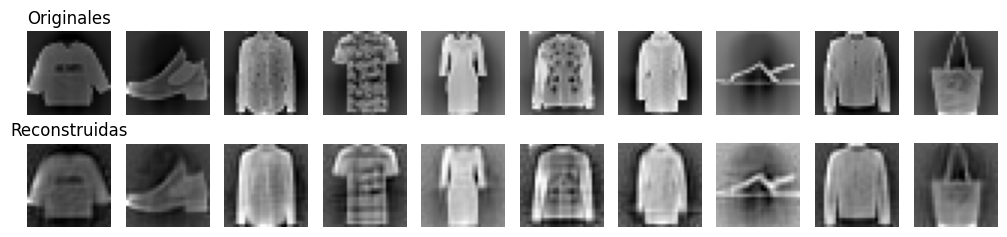

In [33]:
X_reconstructed_1 = pca.inverse_transform(X_pca_1)

fig, axes = plt.subplots(2, 10, figsize=(10, 2.5))
for i in range(10):
    axes[0, i].imshow(X_scaled_1[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed_1[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.tight_layout()
plt.show()

# **Ejercicio 2: Human Activity Recognition with Smartphones**

El objetivo del segundo ejercicio es realizar un Scree Plot el cual nos muestre cuanta varianza va explicando cada componente principal y realizar una reducción de dimensionalidad a través de ICA con 10 componentes. Por último, comparar varianza vs independencia y realizar conclusiones respecto a ambos modelos.

El dataset que se utilizará es Human Activity Recognition with Smartphones el cual contiene registros de 30 voluntarios (edades entre 19 y 48 años) que llevan un smartphone en la cintura mientras realizan las siguientes actividades del día a día: caminar, subir y bajar escaleras, sentado, de pie y acostado.

Cada fila es una ventana temporal (bloque consecutivo de datos), y las 561 columnas de características incluyen estadísticas en dominio temporal y frecuencia calculadas a partir de las señales.

Partiremos cargando las librerias necesarias para ambas reducciones de dimensionalidad y para la construcción del Scree Plot.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import FastICA

Carguemos el dataset y visualicemos las primeras 5 filas para ver su estructura.

In [38]:
df2 = pd.read_csv(path2 + '/train.csv')
df2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Veamos si el dataset posee algún valor nulo para proceder a corregirlo.

In [62]:
nulos = df2.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame? {nulos}")

¿Hay algún valor nulo en el DataFrame? False


Notemos que las últimas dos columnas no aportan información para realizar la reducción de dimensionalidad. La penúltima representa el número del voluntario y la última son strings que indican la actividad que se está realizando.

Por esto procederemos a eliminarlas.

In [39]:
df2 = df2.drop(columns=['subject','Activity'])
df2.shape

(7352, 561)

Antes de realizar tanto PCA como ICA necesitamos estandarizar los datos debido a la sensibilidad de ambos métodos con la escala de las características, es decir datos con dimensionalidad alta se verán muy representados y datos con dimensionalidad baja se verán poco representados.

In [41]:
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(df2)

Ahora, para realizar el Scree Plot realizaremos PCA sin darle un número de componentes ya que así nos entregará la varianza explicada para la totalidad de componentes. Por lo que si tenemos 561 características tendremos la varianza explicada para 561 componentes principales.

In [42]:
pca = PCA()
X_pca_2 = pca.fit_transform(X_scaled_2)

varianza_2 = pca.explained_variance_ratio_

Por último, para visualizar el decaimiento de la varianza explicada haremos un gráfico de barras. Esto nos ayudará visualmente a decidir el número de componentes para realizar una reducción de dimensionalidad a través de PCA.

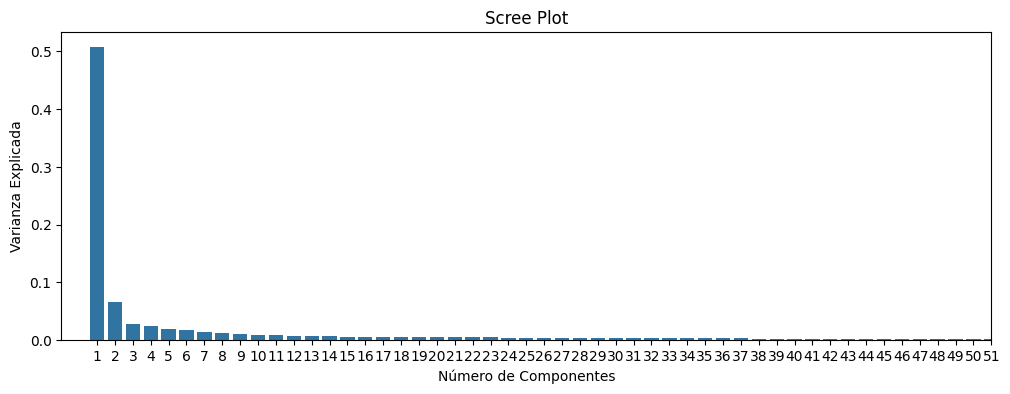

In [43]:
x = np.arange(1, len(varianza_2) + 1)

plt.figure(figsize=(12, 4))
sns.barplot(x=x,y=varianza_2)
plt.xlim(-2,50)
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.grid(False)
plt.show()

Por otro lado, realizaremos la reducción de dimensionalidad con ICA y 10 componentes. A diferencia de PCA este método priorizará la independencia de las características y no se concentrará en retener la mayor cantidad de varianza.

In [ ]:
ica = FastICA(n_components=10, random_state=42)
X_ica_2 = ica.fit_transform(X_scaled_2)

X_ica_2.shape

(7352, 10)

Ahora, veamos cuanta es la varianza que explican las primeras 10 componentes

In [46]:
varianza_acumulada_pca_10 = np.sum(varianza_2[:10])
print(varianza_acumulada_pca_10)

0.7081556875869075


**Comparemos ambos métodos de reducción de dimensionalidad**

- Si el objetivo es principalmente reducir la dimensionalidad del dataset para mejorar la eficiencia de algún modelo o actividades del estilo entonces PCA podría ser suficiente.

- Si el objetivo es obtener las características que tengan una interpretación más directa o analizar la independencia entre las señales y/o la independencia entre las diferentes fuentes de movimiento obtenidas a través de los sensores entonces ICA podría ser suficiente.

# **Ejercicio 3: Wine Quality**

El objetivo del tercer ejercicio es realizar una proyección supervisada a través de LDA a 2 componentes y gráficarlo.

El dataset a utilizar será Wine Quality el cual contiene las propiedades fisicoquímicas de vinos de la región de Vinho Verde (norte de Portugal). También posee una variables de calidad, la cuál es entregada por la calificación de expertos a través del análisis de sus características. Posee 1599 muestras de vino tinto y 4898 muestras de vino blanco.

Partiremos cargando las librerías a utilizar en la reducción de dimensionalidad y para la realización del gráfico requerido.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Carguemos el dataset y visualicemos las primeras 5 filas para ver su estructura.

In [52]:
df3 = pd.read_csv(path3 + '/winequalityN.csv')
df3.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Veamos si el dataset posee algún valor nulo para corregirlo.

In [56]:
df3.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


Notemos que existen 7 características del vino con datos nulos. Como en este ejercicio solo queremos visualizar los datos procederemos a eliminar las filas nulas.


In [64]:
df3 = df3.dropna()
df3.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


Notemos que la última variable del dataset es la calidad del vino, por lo que separaremos el dataset entre las características que definen al vino y la variable objetivo, en este caso la calidad. Además, la primera variables es el tipo de vino así que la eliminaremos ya que no aporta en la reducción de dimensionalidad.

In [65]:
X = df3.drop(columns=['type','quality'])
y = df3['quality']

Antes de realizar la reducción de dimensionalidad procederemos a estandarizar el dataset, debido a que el método LDA es sensible a la escala de las variables.

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ahora procederemos a realizar la reducción de dimensionalidad a través de LDA con 2 componentes. Notemos que al momento de ajustar y transformar los datos escalados le entregamos la variable objetivo ya que este método de reducción de dimensionalidad es supervisado.

Este método no solo busca encontrar las explicación de la máxima varianza sino que también busca encontrar las direcciones que mejor separan las clases definidas por la variable objetivo, en este caso las distintas calidades de vino.

In [67]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

Por último, visualizaremos la proyección supervisada de los datos en 2 dimensiones. Para esto tomaremos como colores las etiquetas de la variable objetivo, resultando lo siguiente.

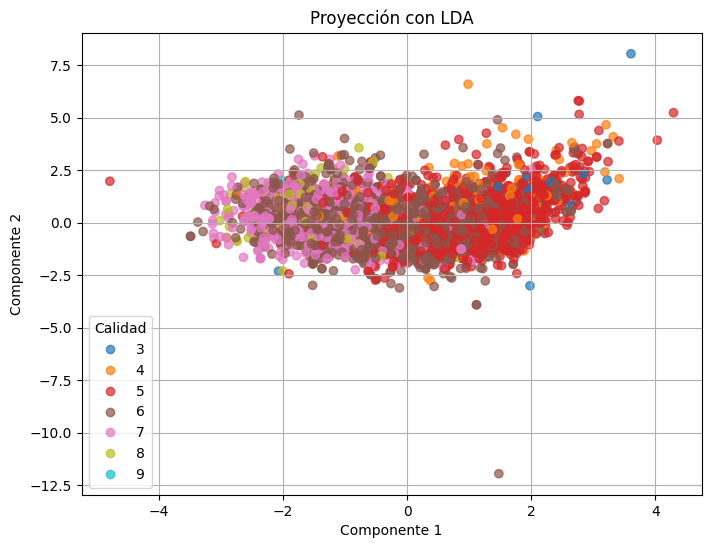

In [68]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Calidad")
plt.title("Proyección con LDA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

# **Ejercicio 4: Credit Card Fraud Detection**

El objetivo del cuarto ejercicio es realizar una reducción de dimensionalidad a través de t-SNE y UMAP a 2 dimensiones. Además de realizar un gráfico coloreando fraude/no fraude.

A diferencia de los modelos vistos en los ejercicios anteriores t-SNE y UMAP son modelos no lineals, es decir, tienen como objetivo preservar las relaciones de vecindad. Para esto utilizan funciones y algoritmos no lineales.

El dataset a utilizar es Credit Card Fraud Detection el cual contiene las transacciones con tarjeta de crédito realizadas por clientes europeos durante dos días en el mes de septiembre de 2013. El dataset posee 284.807 filas de transacciones y 31 columnas de las cuales se tienen componentes principales, tiempo (segundos transcurridos desde la primera transaccion), monto de la transaccion y una variable objetivo que separa casos legítimos y casos fraude.

Partiremos cargando las librerías a utilizar en las reducciones de dimensionalidad y para realizar el gráfico requerido.

In [69]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.preprocessing import StandardScaler

Carguemos el dataset y visualicemos las primeras 5 filas para ver su estructura.

In [70]:
df4 = pd.read_csv(path4 + '/creditcard.csv')
df4.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Ahora, veamos si el dataset posee datos nulos para ser arreglados.

In [71]:
df4.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Notemos que el dataset posee 3 variables que no aportan información para la reducción de dimensionalidad, estas son Time, Amount y Class. Procederemos a eliminarlas y Class la guardaremos en la variable objetivo para luego usarla al momento de visualizar.

In [72]:
X = df4.drop(columns=['Time', 'Amount', 'Class'])
y = df4['Class']

Ahora, antes de realizar las reducciones de dimensionalidad necesitamos estandarizar el dataset, debido a que tanto t-SNE como UMAP son sensibles a la escalabilidad de la dimensión.

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Partiremos usando TSNE. Este es un modelo no lineal, por lo que se ocupa una metodología de entrenamiento para preservar la cercanía y lejanía de los puntos al reducir la dimensionalidad. Se utiliza porque es muy rápido y eficiente para poder visualizar.

In [ ]:
tsne = TSNE(n_components=2, # Numero de componentes
            perplexity=48, # Vecinos cercanos
            learning_rate=200, # Taza de aprendizaje
            random_state=42) # Semilla

X_tsne = tsne.fit_transform(X_scaled)

Por último, procederemos con la visualización de los datos luego de la reducción de dimensionalidad.

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(),title="Fraude")
plt.title("Visualizacion con t-SNE")
plt.grid(True)
plt.show()

# **Ejercicio 5:**

In [ ]:
df5 = pd.read_csv(path5 + '/ENB2012_data.csv')

# Eliminaremos las ultimas dos columnas de respuesta

df5 = df5.drop(columns=['Y1', 'Y2'])

In [ ]:
# Normalizamos nuestros datos para aplicar PCA

X_scaled_5 = scaler.fit_transform(df5)

pca = PCA(n_components=2)
X_pca_5 = pca.fit_transform(X_scaled_5)

varianza_5 = pca.explained_variance_ratio_

In [ ]:
sum(varianza_5)

# Notemos que la varianza explicada acumulada no es mayor o igual a 0.9, sino
# que solo retiene el 62% de los datos, lo cual podria ser considerado una
# desventaja

np.float64(0.6178488249883751)

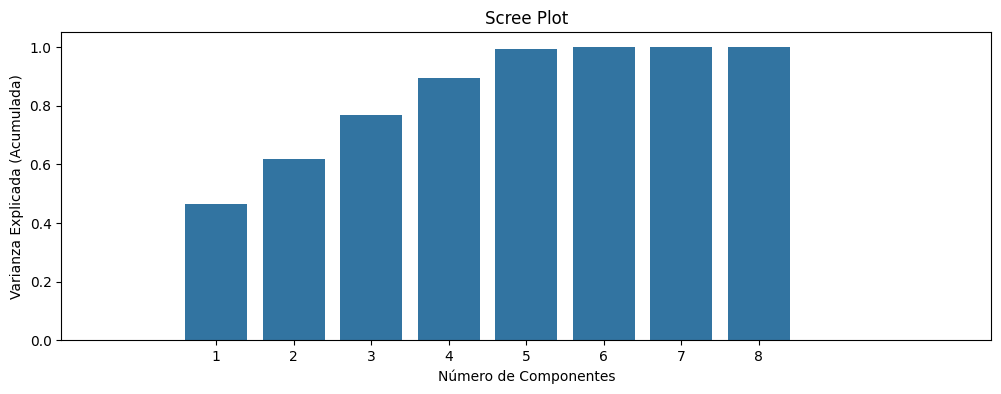

In [ ]:
# Veamos un Scree Plot para ver cuantas componentes son necesarias para obtener
# una varianza explicada acumulada mayor a 90%

pca = PCA()
X_pca_acum = pca.fit_transform(X_scaled_5)

varianza_acum = pca.explained_variance_ratio_

x = np.arange(1, len(varianza_acum) + 1)

# Scree plot
plt.figure(figsize=(12, 4))
sns.barplot(x=x,y=np.cumsum(varianza_acum))
plt.xlim(-2,10)
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada (Acumulada)')
plt.grid(False)
plt.show()

In [ ]:
pca = PCA(n_components=0.9)
X_pca_90 = pca.fit_transform(X_scaled_5)

X_pca_90.shape

# Como podemos notar, hacen falta 5 componentes para obtener una varianza
# explicada acumulada mayor a 90% por lo que en este caso no resulta una gran
# ventaja aplicar PCA con pocas componentes.

(768, 5)